In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

def generate_data(ggap_lo, ggap_hi, gsyn_lo, gsyn_hi, num_points):
  ggap_vals = []
  gsyn_vals = []
  dom_amplitude_vals = []
  dom_period_vals = []
  dimensionality_vals = []
  last_n_percent = 0.50
  C_actual = 0.015
  gc_actual = 0.1
  
  i = 0
  for gsyn in np.linspace(gsyn_lo, gsyn_hi, num_points):
    for ggap in np.linspace(ggap_lo, ggap_hi, num_points):
      i += 1
      start_time = time.time()
      all_dynamics = simulate_until_stable(C_actual, gc_actual, ggap, gsyn)
      
      n = all_dynamics.shape[0]
      fwd_dynamics = all_dynamics[-int(last_n_percent * n):,:]
      elapsed_time = time.time() - start_time
      print("Iteration {0}/{1} for gsyn {2:.2f}, ggap {3:.2f} took {4:.2f}s"
            .format(i, num_points ** 2, gsyn, ggap, elapsed_time))
      
      n = fwd_dynamics.shape[0]
      X = fwd_dynamics - fwd_dynamics.mean(axis = 0)
      pca = PCA()
      projected_X = pca.fit_transform(fwd_dynamics)
      dom_mode = projected_X[:,0]
      dom_amplitude = get_amplitude(dom_mode)
      dom_period = get_period(dom_mode)
      eigen_vals = get_eigenvalues_from_pca(pca, n)
      dimensionality = get_dimensionality(eigen_vals)

      ggap_vals.append(ggap)
      gsyn_vals.append(gsyn)
      dom_amplitude_vals.append(dom_amplitude)
      dom_period_vals.append(dom_period)
      dimensionality_vals.append(dimensionality)
  return ggap_vals, gsyn_vals, dom_amplitude_vals, dom_period_vals, dimensionality_vals

In [8]:
ggap_vals, gsyn_vals, dom_amplitude_vals, dom_period_vals, dimensionality_vals = generate_data(
  ggap_lo = 0,
  ggap_hi = 1.5,
  gsyn_lo = 0,
  gsyn_hi = 1.5,
  num_points = 20)

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.0
Iteration 1/400 for gsyn 0.00, ggap 0.00 took 0.02s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.0
Iteration 2/400 for gsyn 0.00, ggap 0.08 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=0.0
Iteration 3/400 for gsyn 0.00, ggap 0.16 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=0.0
Iteration 4/400 for gsyn 0.00, ggap 0.24 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.0
Iteration 5/400 for gsyn 0.00, ggap 0.32 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.395_gsyn=0.0
Iteration 6/400 for gsyn 0.00, ggap 0.39 took 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.947_gsyn=0.158
Iteration 53/400 for gsyn 0.16, ggap 0.95 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.026_gsyn=0.158
Iteration 54/400 for gsyn 0.16, ggap 1.03 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=0.158
Iteration 55/400 for gsyn 0.16, ggap 1.11 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.184_gsyn=0.158
Iteration 56/400 for gsyn 0.16, ggap 1.18 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.263_gsyn=0.158
Iteration 57/400 for gsyn 0.16, ggap 1.26 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.342_gsyn=0.158
Iteration 58/400 for gsyn 0

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.395
Iteration 101/400 for gsyn 0.39, ggap 0.00 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.395
Iteration 102/400 for gsyn 0.39, ggap 0.08 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=0.395
Iteration 103/400 for gsyn 0.39, ggap 0.16 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=0.395
Iteration 104/400 for gsyn 0.39, ggap 0.24 took 0.02s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.395
Iteration 105/400 for gsyn 0.39, ggap 0.32 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.395_gsyn=0.395
Iteration 106/400 for gs

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.711_gsyn=0.553
Iteration 150/400 for gsyn 0.55, ggap 0.71 took 0.02s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.789_gsyn=0.553
Iteration 151/400 for gsyn 0.55, ggap 0.79 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.553
Iteration 152/400 for gsyn 0.55, ggap 0.87 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.947_gsyn=0.553
Iteration 153/400 for gsyn 0.55, ggap 0.95 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.026_gsyn=0.553
Iteration 154/400 for gsyn 0.55, ggap 1.03 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=0.553
Iteration 155/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.5_gsyn=0.711
Iteration 200/400 for gsyn 0.71, ggap 1.50 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.789
Iteration 201/400 for gsyn 0.79, ggap 0.00 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.789
Iteration 202/400 for gsyn 0.79, ggap 0.08 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=0.789
Iteration 203/400 for gsyn 0.79, ggap 0.16 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=0.789
Iteration 204/400 for gsyn 0.79, ggap 0.24 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.789
Iteration 205/400 for gsyn

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.947
Iteration 252/400 for gsyn 0.95, ggap 0.87 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.947_gsyn=0.947
Iteration 253/400 for gsyn 0.95, ggap 0.95 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.026_gsyn=0.947
Iteration 254/400 for gsyn 0.95, ggap 1.03 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=0.947
Iteration 255/400 for gsyn 0.95, ggap 1.11 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.184_gsyn=0.947
Iteration 256/400 for gsyn 0.95, ggap 1.18 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.263_gsyn=0.947
Iteration 257/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=1.184
Iteration 302/400 for gsyn 1.18, ggap 0.08 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=1.184
Iteration 303/400 for gsyn 1.18, ggap 0.16 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=1.184
Iteration 304/400 for gsyn 1.18, ggap 0.24 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=1.184
Iteration 305/400 for gsyn 1.18, ggap 0.32 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.395_gsyn=1.184
Iteration 306/400 for gsyn 1.18, ggap 0.39 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.474_gsyn=1.184
Iteration 307/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.711_gsyn=1.342
Iteration 350/400 for gsyn 1.34, ggap 0.71 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.789_gsyn=1.342
Iteration 351/400 for gsyn 1.34, ggap 0.79 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=1.342
Iteration 352/400 for gsyn 1.34, ggap 0.87 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.947_gsyn=1.342
Iteration 353/400 for gsyn 1.34, ggap 0.95 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.026_gsyn=1.342
Iteration 354/400 for gsyn 1.34, ggap 1.03 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.342
Iteration 355/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.342_gsyn=1.5
Iteration 398/400 for gsyn 1.50, ggap 1.34 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=1.5
Iteration 399/400 for gsyn 1.50, ggap 1.42 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.5_gsyn=1.5
Iteration 400/400 for gsyn 1.50, ggap 1.50 took 0.03s


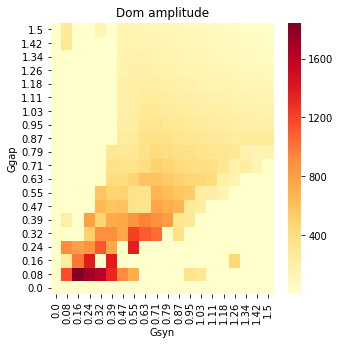

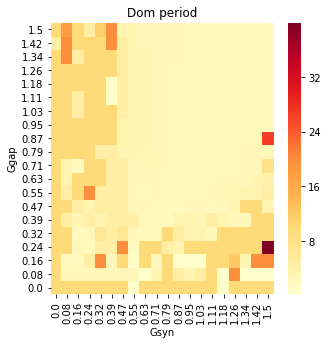

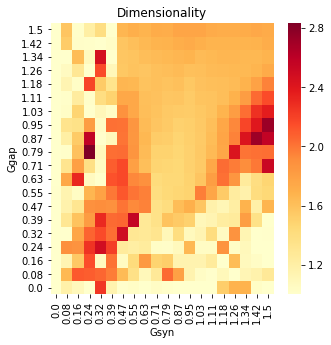

In [9]:
import seaborn as sns
import pandas as pd

def plot_heatmap(ax, ggap_vals, gsyn_vals, output_vals):
  ggap_vals = np.round(ggap_vals, 2)
  gsyn_vals = np.round(gsyn_vals, 2)
  df = pd.DataFrame.from_dict(np.array([ggap_vals,gsyn_vals,output_vals]).T)
  df.columns = ['Ggap','Gsyn','Output']
  df['Output'] = pd.to_numeric(df['Output'])
  pivotted = df.pivot('Ggap','Gsyn','Output')
  # See this for sample color palettes
  # https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
  return sns.heatmap(pivotted,cmap='YlOrRd', ax = ax)

def plot_all_heatmaps(ggap_vals, gsyn_vals, dom_amplitude_vals, dom_period_vals, dimensionality_vals):
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5))
  ax.set_title("Dom amplitude")
  plot_heatmap(ax, ggap_vals, gsyn_vals, dom_amplitude_vals)
  # TODO: If you want to show where the original parameter is
  # ax.scatter(10.0, 10.0, c='blue')
  # Seaborn for some reason inverts the y-axis, so need to un-invert.
  ax.invert_yaxis()
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5))
  ax.set_title("Dom period")
  plot_heatmap(ax, ggap_vals, gsyn_vals, dom_period_vals)
  ax.invert_yaxis()
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5))
  ax.set_title("Dimensionality")
  _ = plot_heatmap(ax, ggap_vals, gsyn_vals, dimensionality_vals)
  ax.invert_yaxis()

plot_all_heatmaps(ggap_vals, gsyn_vals, dom_amplitude_vals, dom_period_vals, dimensionality_vals)

# Redo analysis, but on oscillatory domain

From time_series_clustering.ipynb, we see that the oscillatory domain lies within 0.8 to 1.4 for both ggap and gsyn. We will redo the plot in this smaller range.

In [10]:
ggap_vals, gsyn_vals, dom_amplitude_vals, dom_period_vals, dimensionality_vals = generate_data(
  ggap_lo = 0.8,
  ggap_hi = 1.4,
  gsyn_lo = 0.8,
  gsyn_hi = 1.4,
  num_points = 20)

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.8_gsyn=0.8
Iteration 1/400 for gsyn 0.80, ggap 0.80 took 0.04s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.832_gsyn=0.8
Iteration 2/400 for gsyn 0.80, ggap 0.83 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.863_gsyn=0.8
Iteration 3/400 for gsyn 0.80, ggap 0.86 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.895_gsyn=0.8
Iteration 4/400 for gsyn 0.80, ggap 0.89 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.926_gsyn=0.8
Iteration 5/400 for gsyn 0.80, ggap 0.93 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.958_gsyn=0.8
Iteration 6/400 for gsyn 0.80, ggap 0.96 took 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.147_gsyn=0.863
Iteration 52/400 for gsyn 0.86, ggap 1.15 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.179_gsyn=0.863
Iteration 53/400 for gsyn 0.86, ggap 1.18 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.211_gsyn=0.863
Iteration 54/400 for gsyn 0.86, ggap 1.21 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.242_gsyn=0.863
Iteration 55/400 for gsyn 0.86, ggap 1.24 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.274_gsyn=0.863
Iteration 56/400 for gsyn 0.86, ggap 1.27 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.305_gsyn=0.863
Iteration 57/400 for gsyn 0

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.832_gsyn=0.958
Iteration 102/400 for gsyn 0.96, ggap 0.83 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.863_gsyn=0.958
Iteration 103/400 for gsyn 0.96, ggap 0.86 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.895_gsyn=0.958
Iteration 104/400 for gsyn 0.96, ggap 0.89 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.926_gsyn=0.958
Iteration 105/400 for gsyn 0.96, ggap 0.93 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.958_gsyn=0.958
Iteration 106/400 for gsyn 0.96, ggap 0.96 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.989_gsyn=0.958
Iteration 107/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.211_gsyn=1.021
Iteration 154/400 for gsyn 1.02, ggap 1.21 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.242_gsyn=1.021
Iteration 155/400 for gsyn 1.02, ggap 1.24 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.274_gsyn=1.021
Iteration 156/400 for gsyn 1.02, ggap 1.27 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.305_gsyn=1.021
Iteration 157/400 for gsyn 1.02, ggap 1.31 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.337_gsyn=1.021
Iteration 158/400 for gsyn 1.02, ggap 1.34 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.368_gsyn=1.021
Iteration 159/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.021_gsyn=1.116
Iteration 208/400 for gsyn 1.12, ggap 1.02 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.053_gsyn=1.116
Iteration 209/400 for gsyn 1.12, ggap 1.05 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.084_gsyn=1.116
Iteration 210/400 for gsyn 1.12, ggap 1.08 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.116_gsyn=1.116
Iteration 211/400 for gsyn 1.12, ggap 1.12 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.147_gsyn=1.116
Iteration 212/400 for gsyn 1.12, ggap 1.15 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.179_gsyn=1.116
Iteration 213/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.368_gsyn=1.179
Iteration 259/400 for gsyn 1.18, ggap 1.37 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.4_gsyn=1.179
Iteration 260/400 for gsyn 1.18, ggap 1.40 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.8_gsyn=1.211
Iteration 261/400 for gsyn 1.21, ggap 0.80 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.832_gsyn=1.211
Iteration 262/400 for gsyn 1.21, ggap 0.83 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.863_gsyn=1.211
Iteration 263/400 for gsyn 1.21, ggap 0.86 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.895_gsyn=1.211
Iteration 264/400 for gsyn

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.147_gsyn=1.274
Iteration 312/400 for gsyn 1.27, ggap 1.15 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.179_gsyn=1.274
Iteration 313/400 for gsyn 1.27, ggap 1.18 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.211_gsyn=1.274
Iteration 314/400 for gsyn 1.27, ggap 1.21 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.242_gsyn=1.274
Iteration 315/400 for gsyn 1.27, ggap 1.24 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.274_gsyn=1.274
Iteration 316/400 for gsyn 1.27, ggap 1.27 took 0.00s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.305_gsyn=1.274
Iteration 317/400 for 

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.4_gsyn=1.337
Iteration 360/400 for gsyn 1.34, ggap 1.40 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.8_gsyn=1.368
Iteration 361/400 for gsyn 1.37, ggap 0.80 took 0.03s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.832_gsyn=1.368
Iteration 362/400 for gsyn 1.37, ggap 0.83 took 0.03s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.863_gsyn=1.368
Iteration 363/400 for gsyn 1.37, ggap 0.86 took 0.11s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.895_gsyn=1.368
Iteration 364/400 for gsyn 1.37, ggap 0.89 took 0.01s
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.926_gsyn=1.368
Iteration 365/400 for gsyn

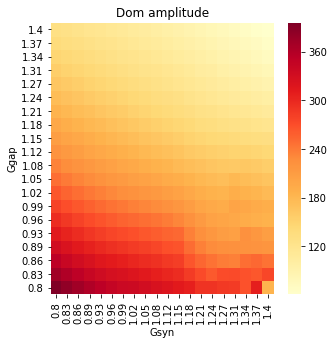

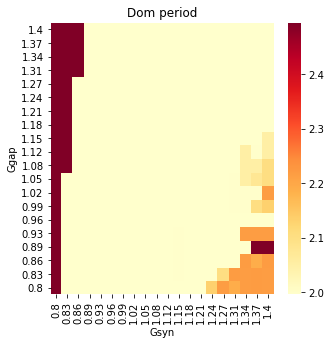

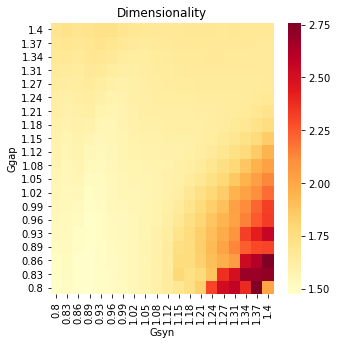

In [11]:
plot_all_heatmaps(ggap_vals, gsyn_vals, dom_amplitude_vals, dom_period_vals, dimensionality_vals)